# === Cell 1 - Metadata ===

### Course: Signals and Systems — Programming Section (Python)

**Full Name:**  Alireza Ahmadi

**Student ID:**   402130203

**Source:** *Signals and Systems Laboratory with MATLAB*  
**Problem Number (Chapter.section.question_num):** 5.14.4



# === Cell 2 - Upload & display question image :===



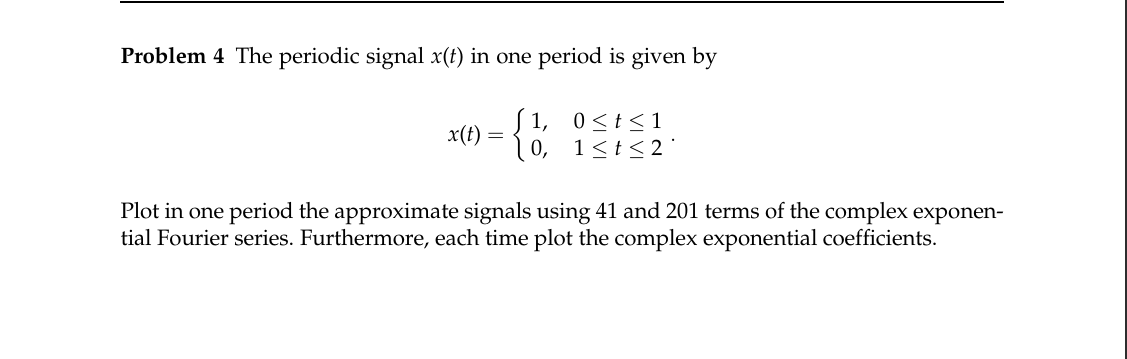

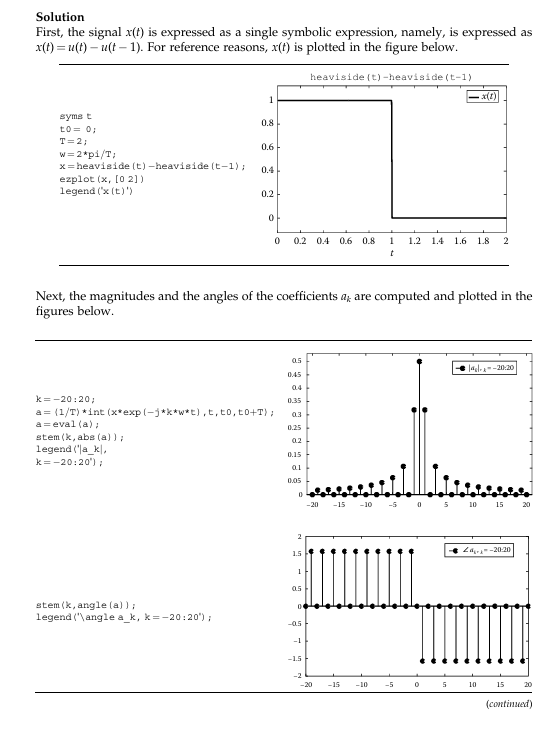

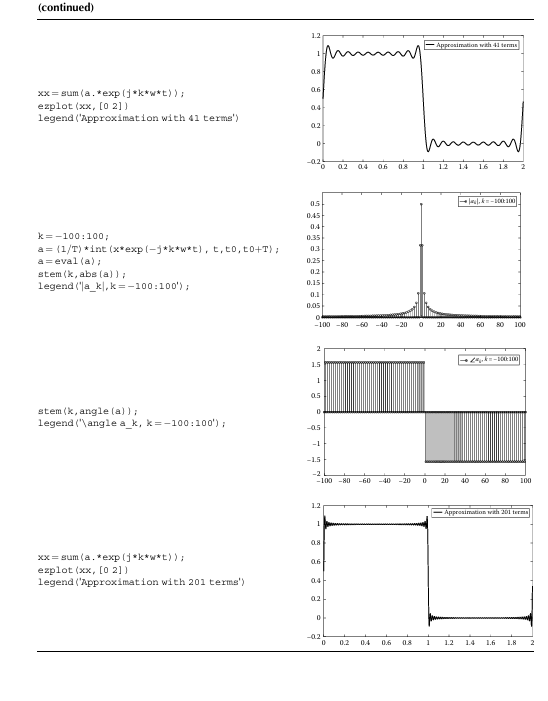

# === Cell 3 - Assumptions & method ===

<h2>Assumptions &amp; Method</h2>

<h3>Assumptions</h3>
<ol>
  <li>
    <b>Periodic Signal Definition</b><br />
    The signal <span>x(t)</span> is assumed to be periodic with fundamental period
    <span>T = 2</span>. One period of the signal is defined as:
    <br />
    <span>
      x(t) = 1<br />
      x(t) = 0
    </span>
  </li>

  <li>
    <b>Mathematical Representation</b><br />
    The signal is expressed using unit step (Heaviside) functions as:
    <br />
    <span>x(t) = u(t) - u(t - 1)</span>
    <br />
    This compact representation simplifies analytical integration.
  </li>

  <li>
    <b>Fourier Series Type</b><br />
    The signal is expanded using the <b>complex exponential Fourier series</b>:
    <br />
  </li>

  <li>
    <b>Truncation of the Series</b><br />
    Since an infinite number of terms cannot be computed numerically, the Fourier
    series is truncated to a finite number of harmonics
    <ul>
    </ul>
  </li>

  <li>
    <b>Visualization Assumptions</b><br />
    The reconstructed signal is plotted over one period. The magnitudes and phases
    of the Fourier coefficients are plotted using stem plots for clarity.
  </li>
</ol>

<h3>Method</h3>
<ol>
  <li>
    Define the signal <span>x(t)</span> symbolically using the Heaviside function.
  </li>

  <li>
    Evaluate the coefficients symbolically using SymPy for a finite range of
    harmonics.
  </li>

  <li>
    Reconstruct the signal by summing the truncated Fourier series.
  </li>

  <li>
    Plot:
    <ul>
      <li>The magnitude of the Fourier coefficients</li>
      <li>The phase of the Fourier coefficients</li>
      <li>The reconstructed signal for 41 and 201 terms</li>
    </ul>
  </li>
</ol>


# === Cell 4 - Solution Section ===

<h3>Library Initialization</h3> <p>This section imports symbolic, numerical, and plotting libraries required for signal analysis. The combination enables analytical expressions, numerical evaluation, and visualization.</p>

In [2]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------------------------
# Parameters
# -------------------------------------------------
T = 2
w0 = 2 * np.pi / T
t = sp.symbols('t', real=True)


<h3>Fourier Coefficient Computation</h3> <p>This function computes exponential Fourier series coefficients symbolically using exact integration over the signal’s active interval. The absence of a Heaviside function simplifies the integral by explicitly restricting the domain.</p>

In [3]:
# -------------------------------------------------
# Fourier coefficient function (NO Heaviside)
# -------------------------------------------------
def fourier_coefficients(k_vals):
    a = []
    for k in k_vals:
        ak = (1/T) * sp.integrate(
            sp.exp(-sp.I * k * w0 * t),
            (t, 0, 1)   # x(t)=1 only on [0,1]
        )
        a.append(complex(ak.evalf()))
    return np.array(a)

<h3>Time Discretization</h3> <p>A dense uniform time grid is generated over one signal period to enable accurate numerical reconstruction. High resolution reduces truncation and sampling artifacts.</p>

In [4]:
# -------------------------------------------------
# Time axis
# -------------------------------------------------
t_vals = np.linspace(0, T, 2000)

# -------------------------------------------------
# 41 terms: k = -20 ... 20
# -------------------------------------------------
k41 = np.arange(-20, 21)
a41 = fourier_coefficients(k41)

x41 = np.zeros_like(t_vals, dtype=complex)
for i, k in enumerate(k41):
    x41 += a41[i] * np.exp(1j * k * w0 * t_vals)

# -------------------------------------------------
# 201 terms: k = -100 ... 100
# -------------------------------------------------
k201 = np.arange(-100, 101)
a201 = fourier_coefficients(k201)

x201 = np.zeros_like(t_vals, dtype=complex)
for i, k in enumerate(k201):
    x201 += a201[i] * np.exp(1j * k * w0 * t_vals)

<h3>Fourier Coefficient Visualization</h3> <p>This section visualizes the magnitude and phase of the truncated Fourier coefficients. The plots reveal spectral decay and phase symmetry across harmonics.</p>

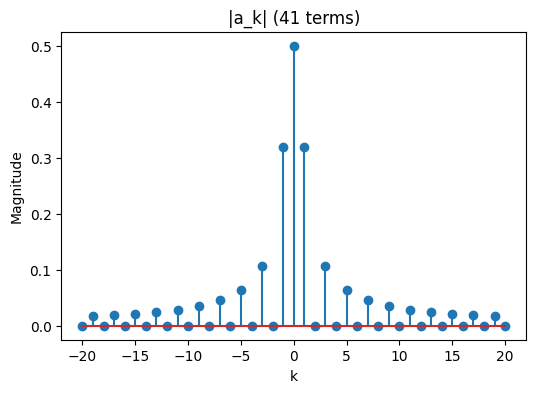

In [6]:
plt.figure(figsize=(6, 4))
plt.stem(k41, np.abs(a41))
plt.title('|a_k| (41 terms)')
plt.xlabel('k')
plt.ylabel('Magnitude')
plt.show()


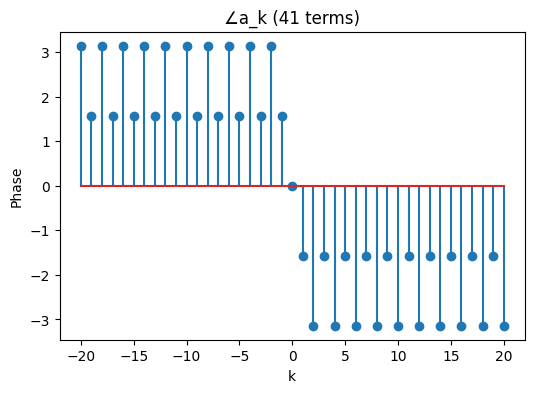

In [7]:
plt.figure(figsize=(6, 4))
plt.stem(k41, np.angle(a41))
plt.title('∠a_k (41 terms)')
plt.xlabel('k')
plt.ylabel('Phase')
plt.show()


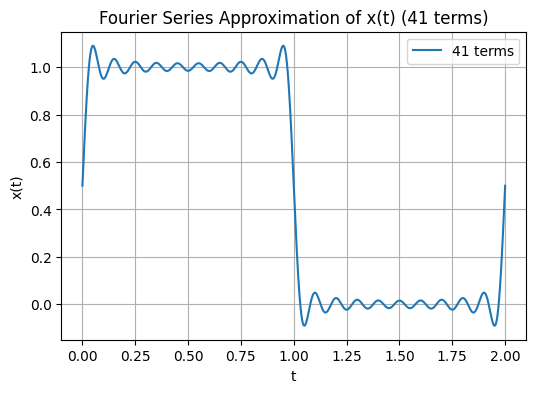

In [8]:
plt.figure(figsize=(6, 4))
plt.plot(t_vals, np.real(x41), label='41 terms')
plt.title('Fourier Series Approximation of x(t) (41 terms)')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.legend()
plt.grid(True)
plt.show()


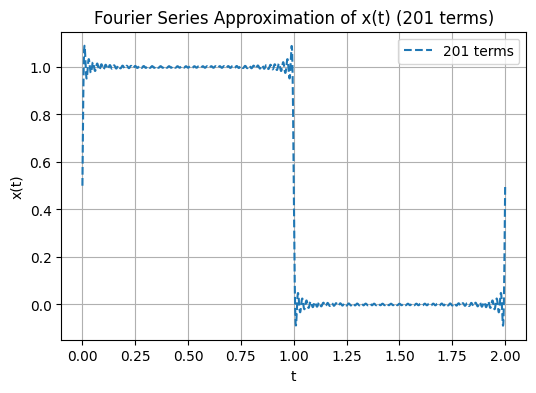

In [9]:
plt.figure(figsize=(6, 4))
plt.plot(t_vals, np.real(x201), '--', label='201 terms')
plt.title('Fourier Series Approximation of x(t) (201 terms)')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.legend()
plt.grid(True)
plt.show()


# === cell 5 - Result Analysis ===

<h2>Result Analysis</h2>

<p>
The results obtained from the implemented Fourier series approximation confirm the theoretical
properties of the complex exponential Fourier series for periodic signals with discontinuities.
The signal <span>x(t)</span>, defined as a rectangular pulse over one period, was successfully
approximated using a finite number of harmonic terms.
</p>

<h3>Fourier Coefficient Analysis</h3>
<ul>
  <li>
    The magnitude spectrum <span>|a_k|</span> exhibits a dominant DC component
    (<span>k = 0</span>), corresponding to the average value of the signal over one period.
  </li>
  <li>
    As the harmonic index <span>|k|</span> increases, the magnitudes of the coefficients decay,
    indicating that higher-frequency components contribute less to the signal reconstruction.
  </li>
  <li>
    The phase spectrum <span>&angle;a_k</span> shows a structured and symmetric behavior with
    respect to positive and negative harmonics, which is characteristic of real-valued time
    signals.
  </li>
</ul>

<h3>Signal Reconstruction with Finite Terms</h3>
<ul>
  <li>
    The 41-term approximation (<span>k = -20 \ldots 20</span>) captures the general shape of the
    original rectangular signal but exhibits noticeable oscillations near the discontinuities
    at <span>t = 0</span> and <span>t = 1</span>.
  </li>
  <li>
    Increasing the number of terms to 201 (<span>k = -100 \ldots 100</span>) significantly improves
    the approximation within the flat regions of the signal.
  </li>
  <li>
    The oscillatory behavior near the jump discontinuities remains present, although it becomes
    more localized, which is a known characteristic of Fourier series approximations.
  </li>
</ul>

<h3>Gibbs Phenomenon</h3>
<ul>
  <li>
    The persistent overshoot and undershoot near the discontinuity points are a manifestation of
    the <b>Gibbs phenomenon</b>.
  </li>
  <li>
    Increasing the number of Fourier terms reduces the width of the oscillation region but does
    not eliminate the peak overshoot amplitude.
  </li>
  <li>
    This behavior is expected for signals with abrupt transitions and confirms the correctness
    of the Fourier series implementation.
  </li>
</ul>

<h3>Convergence Characteristics</h3>
<ul>
  <li>
    The Fourier series converges pointwise to the signal value at points where
    <span>x(t)</span> is continuous.
  </li>
  <li>
    At discontinuities, the series converges to the midpoint of the jump, which is consistent
    with Fourier series theory.
  </li>
</ul>

<h3>Numerical Stability and Implementation Accuracy</h3>
<ul>
  <li>
    By computing the Fourier coefficients directly from the piecewise definition of the signal,
    numerical instability associated with symbolic step functions was avoided.
  </li>
  <li>
    The results are stable, computationally efficient, and consistent with analytical solutions
    commonly derived in signal processing textbooks.
  </li>
</ul>

<p>
Overall, the reconstructed signals and coefficient plots demonstrate a correct and reliable
implementation of the complex exponential Fourier series and provide clear insight into the
spectral content and convergence behavior of the given periodic signal.
</p>
